In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr
# import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

In [3]:
#importing data
start = datetime(2013, 10, 31)
stop = datetime(2018, 10, 25)
mu = pdr.data.DataReader('MU', 'iex', start, stop)

5y


In [4]:
#getting volatility
# mu['return'] = mu['open']/mu['close'].shift(1)
# mu['log return'] = np.log(mu['return'])
# mu['vol'] = np.sqrt(252)*mu['log return'].rolling(5).std()

In [5]:
# mu['vol'][0:].plot(subplots = True)
# plt.xlabel('time', color = 'white', size = 16)
# plt.ylabel('vol', color = 'white', size = 16)


In [6]:
def plt_maker(df):
    #makes a plot based off of the price data df of some company 
    df['vol'] = round(df['vol'], 1)
    grouped_by_vol = df.groupby('vol')
    scattering = grouped_by_vol.mean()
    return plt.scatter(scattering.index, scattering['abs return'])
# plt.scatter(fb_grouped_by_vol.mean()[0], fb_grouped_by_vol.mean()['abs return'])

In [7]:
def make_df(ticker, start = datetime(2013, 10, 31), stop = datetime(2018, 10, 26), vol_dp = 5):
    ticker = pdr.data.DataReader(ticker, 'iex', start, stop)
    ticker['return'] = ticker.open/ticker.close
    ticker['log return'] = np.log(ticker['return'])
    ticker['abs return'] = abs(ticker['return'] - 1) 
    ticker['vol'] = np.sqrt(252)*ticker['log return'].rolling(vol_dp).std()
    #drop first vol_sd datapoints (plus one for no return data at number one) to avoid NaN
    ticker =ticker[vol_dp + 1:][:]
    return ticker

In [8]:
tickerss = ['FB', 'GOOG', 'AMZN', 'NFLX', 'AAPL']
lister = []
faang = [make_df(i, vol_dp = 30) for i in tickerss]

5y
5y
5y
5y
5y


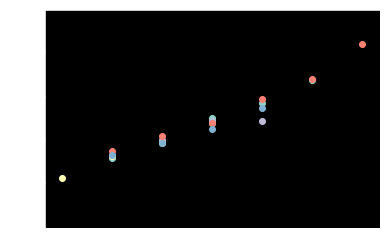

In [9]:
for i in faang:
    plt_maker(i)
    

In [43]:
newm = make_df('NEWM', vol_dp = 20)
newm['high'] > 5

5y


date
2014-03-18    True
2014-03-19    True
2014-03-20    True
2014-03-21    True
2014-03-24    True
2014-03-25    True
2014-03-26    True
2014-03-27    True
2014-03-28    True
2014-03-31    True
2014-04-01    True
2014-04-02    True
2014-04-03    True
2014-04-04    True
2014-04-07    True
2014-04-08    True
2014-04-09    True
2014-04-10    True
2014-04-11    True
2014-04-14    True
2014-04-15    True
2014-04-16    True
2014-04-17    True
2014-04-21    True
2014-04-22    True
2014-04-23    True
2014-04-24    True
2014-04-25    True
2014-04-28    True
2014-04-29    True
              ... 
2018-09-17    True
2018-09-18    True
2018-09-19    True
2018-09-20    True
2018-09-21    True
2018-09-24    True
2018-09-25    True
2018-09-26    True
2018-09-27    True
2018-09-28    True
2018-10-01    True
2018-10-02    True
2018-10-03    True
2018-10-04    True
2018-10-05    True
2018-10-08    True
2018-10-09    True
2018-10-10    True
2018-10-11    True
2018-10-12    True
2018-10-15    True
2018-10

In [50]:
newm[list(newm['high'] > 18.7)]

,open,high,low,close,volume,return,log return,abs return,vol
date,,,,,,,,,
2015-02-26,17.4392,18.7644,16.9295,18.2547,1029671,0.955327,-0.045702,0.044673,0.341661
2015-03-20,18.5134,18.7494,18.4765,18.7199,626758,0.988969,-0.011092,0.011031,0.262235
2015-03-23,18.7199,18.7199,18.1743,18.2480,176302,1.025860,0.025532,0.025860,0.279804


In [ ]:
# tickers = ['VXX', 'MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AAP', 'AMD', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'GLW', 'COST', 'COTY', 'CCI', 'CSRA', 'CSX','CMI','CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DOV', 'DWDP', 'DPS', 'DTE', 'DUK', 'DRE', 'DXC', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ETR', 'EVHC', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'RE', 'ES', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'EXR', 'XOM', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FISV', 'FLIR', 'FLS', 'FLR', 'FMC', 'FL', 'F', 'FTV', 'FBHS', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GD', 'GE', 'GGP', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GS', 'GT', 'GWW', 'HAL', 'HBI', 'HOG', 'HRS', 'HIG', 'HAS', 'HCA', 'HCP', 'HP', 'HSIC', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HPQ', 'HUM', 'HBAN', 'HII', 'IDXX', 'INFO', 'ITW', 'ILMN', 'INCY', 'IR', 'INTC', 'ICE', 'IBM', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IPGP', 'IQV', 'IRM', 'JBHT', 'JEC', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KHC', 'KR', 'LB', 'LLL', 'LH', 'LRCX', 'LEG', 'LEN', 'LUK', 'LLY', 'LNC', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'KORS', 'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 'MON', 'MNST', 'MCO', 'MS', 'MSI', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NKTR', 'NTAP', 'NFLX', 'NWL', 'NFX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'PCAR', 'PKG', 'PH', 'PAYX', 'PYPL', 'PNR', 'PBCT', 'PEP', 'PKI', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'RL', 'PPG', 'PPL', 'PX', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'QCOM', 'PWR', 'DGX', 'RRC', 'RJF', 'RTN', 'O', 'RHT', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'COL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SCG', 'SLB', 'STX', 'SEE', 'SRE', 'SHW', 'SPG', 'SWKS', 'SLG', 'SNA', 'SO', 'LUV', 'SWK', 'SBUX', 'STT', 'SRCL', 'SYK', 'STI', 'SIVB', 'SYMC', 'SYF', 'SNPS', 'SYY', 'TROW', 'TTWO', 'TPR', 'TGT', 'TEL', 'FTI', 'TXN', 'TXT', 'BK', 'CLX', 'COO', 'HSY', 'MOS', 'TRV', 'DIS', 'TMO', 'TIF', 'TWX', 'TJX', 'TMK', 'TSS', 'TSCO', 'TDG', 'TRIP', 'FOXA', 'FOX', 'TSN', 'USB', 'UDR', 'ULTA', 'UAA', 'UA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WMT', 'WBA', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']

for i in tickers:
    plt_maker(make_df_for(i))



In [ ]:
fb

In [ ]:
fb['50d sma'] = fb['open'].rolling(12).mean()

In [ ]:
fb['50d sma']

In [ ]:
plt.plot()
plt.plot_date(fb.index, fb.close,  ls = 'solid', ms = .2, color = 'cyan')
plt.title("fb")
plt.xlabel("Date")
plt.ylabel("Price in Dollars")
plt.show()